In [1]:
import geopandas as gpd

## Importando os dados


In [2]:
# ler o shapefile de São Paulo
sp_estado = gpd.read_file(
    "../SIRGAS_limites_municipios_estado_sao_paulo/SIRGAS_limites_municipais.shp"
)

In [3]:
# visualizar a tabela
sp_estado.head()

,limite_id,municipio,Geometry_s,geometry
0,1,ITANHAÉM,1J6s,"POLYGON ((307339.109 7316497.555, 306260.118 7..."
1,10,EMBU-GUAÇU,1J6tf,"POLYGON ((306250.297 7350903.625, 306194.975 7..."
2,100,ITUVERAVA,None,"POLYGON ((194518.637 7762304.185, 194541.437 7..."
3,101,JABORANDI,None,"POLYGON ((142127.776 7701403.306, 142041.293 7..."
4,102,JABOTICABAL,None,"POLYGON ((150695.076 7658574.445, 150773.090 7..."


<Axes: >

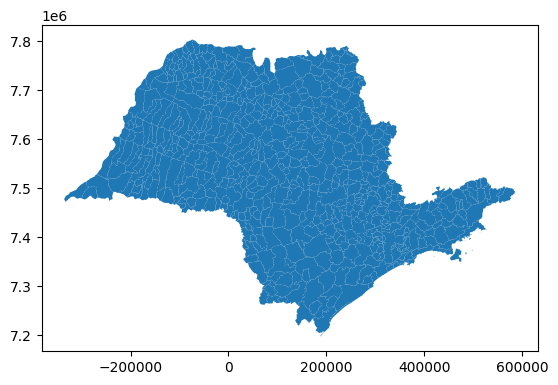

In [4]:
# visualizar o shapefile
sp_estado.plot()

In [5]:
# quero criar um novo dataframe somente como São Paulo na coluna municipio
sp_cidade = sp_estado[sp_estado["municipio"] == "SÃO PAULO"]

In [6]:
sp_cidade

,limite_id,municipio,Geometry_s,geometry
700,27,SÃO PAULO,1J6tN,"POLYGON ((325466.447 7409331.257, 325486.462 7..."


<Axes: >

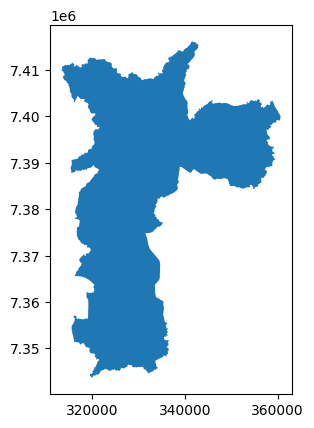

In [7]:
sp_cidade.plot()

In [8]:
# importa o arquivo de zonas OD
zonas_estado = gpd.read_file(
    "../SIRGAS_SHP_origemdestino_2017/SIRGAS_SHP_origemdestino_2017/SIRGAS_SHP_origemdestino_2017.shp"
)

In [9]:
zonas_estado

,od_id,od_nome,od_area,od_ano,od_municip,geometry
0,1,Sé,57.10,2017,36,"POLYGON ((333700.651 7394607.628, 333753.675 7..."
1,2,Parque Dom Pedro,113.64,2017,36,"POLYGON ((333067.381 7395413.270, 333081.326 7..."
2,3,Praça João Mendes,47.75,2017,36,"POLYGON ((333314.447 7393920.945, 333199.280 7..."
3,4,Ladeira da Memória,75.11,2017,36,"POLYGON ((332703.855 7394783.117, 332703.772 7..."
4,5,República,74.95,2017,36,"POLYGON ((332945.197 7395250.368, 332965.475 7..."
...,...,...,...,...,...,...
513,510,Caucaia,10265.92,2017,7,"POLYGON ((297452.523 7382633.903, 297446.734 7..."
514,514,Itapevi,1070.03,2017,17,"POLYGON ((303287.359 7397164.136, 303340.176 7..."
515,515,Amador Bueno,5113.23,2017,17,"POLYGON ((303253.591 7397162.576, 303287.359 7..."
516,516,Santana de Parnaíba,18034.76,2017,31,"POLYGON ((296233.207 7398934.712, 296157.605 7..."


<Axes: >

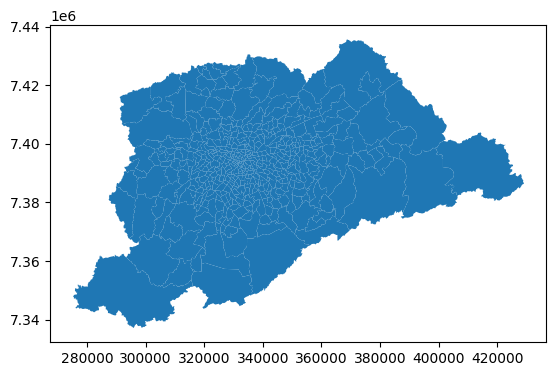

In [10]:
zonas_estado.plot()

## Corrigindo geometrias


In [11]:
zonas_estado_corrected = zonas_estado.copy()
sp_cidade_corrected = sp_cidade.copy()

zonas_estado_corrected["geometry"] = zonas_estado_corrected["geometry"].buffer(0)
sp_cidade_corrected["geometry"] = sp_cidade_corrected["geometry"].buffer(0)

## Operação de clip


In [12]:
# agora quero um novo dataset que é o resultado do clip entre o shapefile de zonas e o shapefile da cidade de São Paulo. Ou seja, quero obter zomente as zonas que estão contidas dentro do contorno da cidade de São Paulo.~
zonas_cidade_sp = gpd.clip(zonas_estado_corrected, sp_cidade_corrected)

In [13]:
zonas_cidade_sp

,od_id,od_nome,od_area,od_ano,od_municip,geometry
268,474,Santa Rita,5614.14,2017,10,"MULTIPOLYGON (((316050.769 7356982.413, 316043..."
267,473,Cipó,2226.59,2017,10,"MULTIPOLYGON (((319466.548 7364656.634, 319476..."
266,472,Embu-Guaçu,7756.92,2017,10,"MULTIPOLYGON (((318859.228 7370415.861, 318838..."
262,468,Itapecerica da Serra,7478.56,2017,16,"MULTIPOLYGON (((316290.045 7379370.633, 316290..."
328,299,Marsilac,20795.96,2017,36,"MULTIPOLYGON (((319205.588 7359408.669, 319228..."
...,...,...,...,...,...,...
410,365,Várzea do Palácio,646.76,2017,15,"MULTIPOLYGON (((348043.601 7402825.988, 348017..."
409,364,Cumbica,689.34,2017,15,"MULTIPOLYGON (((350728.453 7402250.067, 350659..."
423,378,Pimentas,1685.56,2017,15,"MULTIPOLYGON (((354635.453 7403408.930, 354617..."
426,381,Morro dos Macacos,3533.19,2017,15,"MULTIPOLYGON (((340328.471 7409872.345, 340338..."


<Axes: >

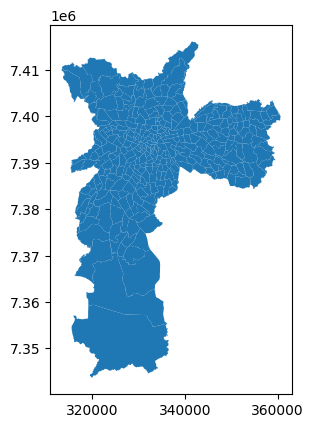

In [14]:
zonas_cidade_sp.plot()

## salvando o dataset


In [26]:
# agora salva o novo dataframe em um arquivo shapefile de nome "contorno_cidade_sp.shp"
sp_cidade_corrected.to_file("contorno_cidade_sp.shp")

In [27]:
zonas_cidade_sp.to_file("zonas_cidade_sp.shp")